In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install seaborn

  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
     |████████████████████████████████| 29.0 MB 4.3 MB/s 
     |████████████████████████████████| 15.3 MB 7.0 MB/s 
     |████████████████████████████████| 8.5 MB 3.1 MB/s 
     |████████████████████████████████| 10.1 MB 4.8 MB/s 
     |████████████████████████████████| 2.2 MB 9.2 MB/s 
     |████████████████████████████████| 61 kB 298 kB/s 
     |████████████████████████████████| 67 kB 8.0 MB/s 
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pytz-2020.4-py2.py3-none-any.whl (509 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## A célula abaixo serve para que eu possa ler todas as entradas requisitadas nesse exercício.

In [143]:
# Função pra ler os arquivos.
def Read(file):
    data = []
    read = open(file, 'r')
    next(read)

    for row in read.readlines():
        change = row.strip("\n").replace("\t", ",").split(",") # Ao invés de a linha quebrar, ela vai continuar com um TAB.
        for value in change:
            data.append(int(value))
            
    read.close()
    return data
    

In [144]:
# Ler os arquivos
dados1000 = Read('Inputs/1000.txt')
dados5000 = Read('Inputs/5000.txt')
dados10000 = Read('Inputs/10000.txt')
dados20000 = Read('Inputs/20000.txt')
dados50000 = Read('Inputs/50000.txt')
dados75000 = Read('Inputs/75000.txt')
dados100000 = Read('Inputs/100000.txt')

# Selection Sort
### Esse algoritmo ordena um array procurando sempre o mínimo elemento desse array, assim que ele acha esse elemento mínimo, o mesmo elemento vai para o começo do array.
### O algoritmo mantém 2 arrays, um para os elementos que estão sendo ordenados, e o outro array são dos elementos que ainda não foram ordenados.

In [145]:
def selection_sort(entrada):
    # indica quantos itens foram ordenados
    for i in range(len(entrada)-1):
        # Procura o mínimo valor de um segmento não ordenado
        # Primeiro pegamos o primeiro valor e dizemos que ele é o menor
        min_index = i
        # agora j vai ser usado para um loop para os elementos que sobraram
        for j in range(i+1, len(entrada)-1):
            # atualiza a variavel min_index, se caso o j for menor que o atual valor
            if entrada[j] < entrada[min_index]:
                min_index = j
        # depois de encontrar o menor valor que não está ordenado, troca com o primeiro valor que também não está ordenado ainda
        entrada[i], entrada[min_index] = entrada[min_index], entrada[i]

    return entrada

# Usei abaixo, para testar se o algoritmo estava funcionando:

# # L = [3, 1, 41, 59, 26, 53, 59] 3 1 41 59 26 53 59  
# selection_sort(entrada)
# print(entrada)

### Rodando Selection Sort com 1000 números

In [97]:
# Fazer a leitura dos arquivos e descobrindo o tempo de processamento do algoritmo.

selection_start_time = time.time()
selection_sort(dados1000[:]) # Faz cópia do array.
selection_final_time = time.time()
selection_middle_time_1000 = selection_final_time - selection_start_time
print(selection_middle_time_1000) 

0.07269597053527832


### Rodando Selection Sort com 5000 números

In [99]:
selection_start_time = time.time()
selection_sort(dados5000[:])
selection_final_time = time.time()
selection_middle_time_5000 = selection_final_time - selection_start_time
print(selection_middle_time_5000) 

1.4877378940582275


### Rodando Selection Sort com 10000 números

In [100]:
selection_start_time = time.time()
selection_sort(dados10000[:])
selection_final_time = time.time()
selection_middle_time_10000 = selection_final_time - selection_start_time
print(selection_middle_time_10000)

5.508242130279541


### Rodando Selection Sort com 20000 números

In [128]:
selection_start_time = time.time()
selection_sort(dados20000[:])
selection_final_time = time.time()
selection_middle_time_20000 = selection_final_time - selection_start_time
print(selection_middle_time_20000)

19.025431871414185


### Rodando Selection Sort com 50000 números

In [130]:
selection_start_time = time.time()
selection_sort(dados50000[:])
selection_final_time = time.time()
selection_middle_time_50000 = selection_final_time - selection_start_time
print(selection_middle_time_50000)

118.39362096786499


### Rodando Selection Sort com 75000 números

In [131]:
selection_start_time = time.time()
selection_sort(dados75000[:])
selection_final_time = time.time()
selection_middle_time_75000 = selection_final_time - selection_start_time
print(selection_middle_time_75000)

275.18445324897766


### Rodando Selection Sort com 100000 números

In [124]:
selection_start_time = time.time()
selection_sort(dados100000[:])
selection_final_time = time.time()
selection_middle_time_100000 = selection_final_time - selection_start_time
print(selection_middle_time_100000)

470.25417280197144


# Quick Sort
### É um algoritmo de dividir e conquistar. Dá para usar o pivô de algumas formas diferentes, como: 1) Sempre pegar o pivô como primeiro elemento, 2) Sempre pegar o último elemento, 3) Pegar um elemento randômico e 4) Pegar um pivô mediano.
###  Na implementação abaixo, eu faço um DEF de partição (partition()), que no caso dado um array e um pivô Y, irei colocar esse pivô Y na posição correta no array ordenado, coloco todos os elementos menores que Y, antes do pivô Y e coloco todos os valores maiores que Y depois do pivô Y.

In [146]:
def partition(array, start, end):
    pivot = array[start] # primeiro elemento do array
    low = start + 1 # Segundo elemento do array
    high = end # último elemento do array

    while True:
        # Se caso o valor atual que estamos procurando, seja maior que o pivô
        # e ele está na direita do pivô, ou seja, está no lugar correto.
        # Nós podemos ir para o próximo elemento que no caso está na esquerda.
        # Tenho que checar se eu não ultrapassei o menor ponto, 
        # pois ele indica que nós ja colocamos todos os elementos para o lado correto do pivô
        while low <= high and array[high] >= pivot:
            high = high - 1 # Ele vai indo para a esquerda, visto que essa variável está apontando para o último elemento do array.

        # Essa parte faz exatamente o oposto da de cima.
        while low <= high and array[low] <= pivot:
            low = low + 1 # Ele vai indo para a direita, visto que a variável está apontando para o segundo elemento do array.

        # Nós temos que encontrar um valor para a sublista low e high que está fora de ordem, e no caso nós iremos trocar as posições
        # Se low for maior que high, sai do loop.
        if low <= high:
            array[low], array[high] = array[high], array[low]
            # o loop continua
        else:
            # sai do loop
            break

    array[start], array[high] = array[high], array[start]

    return high


def quick_sort(array, start, end):
    if start >= end:
        return

    p = partition(array, start, end)
    quick_sort(array, start, p-1)
    quick_sort(array, p+1, end)

    return (array, 0, len(array) - 1)

# Usei abaixo para testar se o algoritmo estava funcionando:

# array = [29,99,27,41,66,28,44,78,87,19,31,76,58,88,83,97,12,21,44]
# quick_sort(array, 0, len(array) - 1) 
# print(array)


### Rodando Quick Sort com 1000 números

In [101]:
quick_start_time = time.time()
quick_sort(dados1000[:], 0, len(dados1000) - 1)
quick_final_time = time.time()
quick_middle_time_1000 = quick_final_time - quick_start_time
print(quick_middle_time_1000)

0.004339933395385742


### Rodando Quick Sort com 5000 números

In [102]:
quick_start_time = time.time()
quick_sort(dados5000[:], 0, len(dados5000) - 1)
quick_final_time = time.time()
quick_middle_time_5000 = quick_final_time - quick_start_time
print(quick_middle_time_5000)

0.04148721694946289


### Rodando Quick Sort com 10000 números

In [103]:
quick_start_time = time.time()
quick_sort(dados10000[:], 0, len(dados10000) - 1)
quick_final_time = time.time()
quick_middle_time_10000 = quick_final_time - quick_start_time
print(quick_middle_time_10000)

0.06205105781555176


### Rodando Quick Sort com 20000 números

In [104]:
quick_start_time = time.time()
quick_sort(dados20000[:], 0, len(dados20000) - 1)
quick_final_time = time.time()
quick_middle_time_20000 = quick_final_time - quick_start_time
print(quick_middle_time_20000)

0.10458588600158691


### Rodando Quick Sort com 50000 números

In [105]:
quick_start_time = time.time()
quick_sort(dados50000[:], 0, len(dados50000) - 1)
quick_final_time = time.time()
quick_middle_time_50000 = quick_final_time - quick_start_time
print(quick_middle_time_50000)

0.23424196243286133


### Rodando Quick Sort com 75000 números

In [106]:
quick_start_time = time.time()
quick_sort(dados75000[:], 0, len(dados75000) - 1)
quick_final_time = time.time()
quick_middle_time_75000 = quick_final_time - quick_start_time
print(quick_middle_time_75000)

0.3752410411834717


### Rodando Quick Sort com 100000 números

In [107]:
quick_start_time = time.time()
quick_sort(dados100000[:], 0, len(dados100000) - 1)
quick_final_time = time.time()
quick_middle_time_100000 = quick_final_time - quick_start_time
print(quick_middle_time_100000)

0.5368571281433105


# Tree Sort
### É um algoritmo de ordenação que é baseado na estrutura de dados de árvore binária. 
### Primeiro ele cria uma árvore binária baseado nos elementos do array e depois ele roda o algoritmo "em-ordem" na árvore binária que foi criada, para que a mesma possa ser ordenada.

### https://www.youtube.com/watch?v=n2MLjGeK7qA , vídeo que explica muito bem (0:26)

In [147]:
class node():
    # Estrutura da árvore binária
    def __init__(self, val):
        self.val = val
        self.left = None 
        self.right = None 
    
    def insert(self,val):
        if self.val:
            if val < self.val:
                if self.left is None:
                    self.left = node(val)
                else:
                    self.left.insert(val)
            elif val > self.val:
                if self.right is None:
                    self.right = node(val)
                else:
                    self.right.insert(val)
        else:
            self.val = val

def inorder(root, res):
    # travessia recursiva 
    if root:
        inorder(root.left,res)
        res.append(root.val)
        inorder(root.right,res)

def treesort(entrada):
    if len(entrada) == 0:
        return entrada # Caso não tenha nada no arquivo
    root = node(entrada[0]) # pega o primeiro elemento do array para ser o nó root
    for i in range(1,len(entrada)):
        root.insert(entrada[i]) # Usa a função insert(), para ir adicionando na árvore
    # Faz a travessia em-ordem
    res = []
    inorder(root,res) # Pega da árvore e ordena em-ordem e coloca no array os elementos ordenados
    return res 

# Usei abaixo para testar se o algoritmo estava funcionando:

# print(treesort([7,1,5,2,19,14,17]))

### Rodando Tree Sort com 1000 números

In [108]:
tree_start_time = time.time()
treesort(dados1000[:])
tree_final_time = time.time()
tree_middle_time_1000 = tree_final_time - tree_start_time
print(tree_middle_time_1000)

0.010622978210449219


### Rodando Tree Sort com 5000 números

In [109]:
tree_start_time = time.time()
treesort(dados5000[:])
tree_final_time = time.time()
tree_middle_time_5000 = tree_final_time - tree_start_time
print(tree_middle_time_5000)

0.06672191619873047


### Rodando Tree Sort com 10000 números

In [110]:
tree_start_time = time.time()
treesort(dados10000[:])
tree_final_time = time.time()
tree_middle_time_10000 = tree_final_time - tree_start_time
print(tree_middle_time_10000)

0.11207795143127441


### Rodando Tree Sort com 20000 números

In [111]:
tree_start_time = time.time()
treesort(dados20000[:])
tree_final_time = time.time()
tree_middle_time_20000 = tree_final_time - tree_start_time
print(tree_middle_time_20000)

0.33507609367370605


### Rodando Tree Sort com 50000 números

In [112]:
tree_start_time = time.time()
treesort(dados50000[:])
tree_final_time = time.time()
tree_middle_time_50000 = tree_final_time - tree_start_time
print(tree_middle_time_50000)

0.6826376914978027


### Rodando Tree Sort com 75000 números

In [113]:
tree_start_time = time.time()
treesort(dados75000[:])
tree_final_time = time.time()
tree_middle_time_75000 = tree_final_time - tree_start_time
print(tree_middle_time_75000)

1.2700159549713135


### Rodando Tree Sort com 100000 números

In [114]:
tree_start_time = time.time()
treesort(dados100000[:])
tree_final_time = time.time()
tree_middle_time_100000 = tree_final_time - tree_start_time
print(tree_middle_time_100000)

1.6345610618591309


# Radix Sort
### A ideia é esse algoritmo ir varrendo de dígito por dígito, começando do dígito menos significativo até o mais significativo. 
### Exemplo:
    ARRAY: [170, 45, 75, 90, 802, 24, 2, 66]
Sorting by least significant digit (1s place) gives: 
170, 90, 802, 2, 24, 45, 75, 66

Sorting by next digit (10s place) gives: 
802, 2, 24, 45, 66, 170, 75, 90

Sorting by the most significant digit (100s place) gives:
2, 24, 45, 66, 75, 90, 170, 802

In [148]:
# Esse exp1 representa o dígito dos elementos
def countingSort(arr, exp1): 

	n = len(arr) 

	# Os elementos do array de output que irão ser ordenados
	output = [0] * (n) 

	# inicializa o count array como 0
	count = [0] * (10) 

	# Armazena a quantidade de ocorrências dentro de count[]
	for i in range(0, n): 
		index = (arr[i] / exp1) 
		count[int(index % 10)] += 1

	# Muda o count[i], para que o mesmo seja atualizado, no caso contendo a sua nova posição no array output.
	for i in range(1, 10): 
		count[i] += count[i - 1] 

	# Builda o array output
	i = n - 1
	while i >= 0: 
		index = (arr[i] / exp1) 
		output[count[int(index % 10)] - 1] = arr[i] 
		count[int(index % 10)] -= 1
		i -= 1

	# Copia o que tem dentro de output, para arr[], para que arr tenha os números ordenados
	i = 0
	for i in range(0, len(arr)): 
		arr[i] = output[i] 

def radixSort(entrada): 

	# Procura o valor máximo, para saber o número de dígitos
	max1 = max(entrada)  

	# Faz o counting sort para TODOS os dígitos
	# exp é 10^i, onde i é o dígito atual do elemento
	exp = 1
	while max1 / exp > 0: 
		countingSort(entrada, exp) 
		exp *= 10

	return entrada

# Usei abaixo para testar se o algoritmo estava funcionando:

# arr = [170, 45, 75, 90, 802, 24, 2, 66] 
# radixSort(arr) 
# print(arr)



### Rodando Radix Sort com 1000 números

In [115]:
radix_start_time = time.time()
radixSort(dados1000[:])
radix_final_time = time.time()
radix_middle_time_1000 = radix_final_time - radix_start_time
print(radix_middle_time_1000)

0.5473160743713379


### Rodando Radix Sort com 5000 números

In [116]:
radix_start_time = time.time()
radixSort(dados5000[:])
radix_final_time = time.time()
radix_middle_time_5000 = radix_final_time - radix_start_time
print(radix_middle_time_5000)

3.2991020679473877


### Rodando Radix Sort com 10000 números

In [117]:
radix_start_time = time.time()
radixSort(dados10000[:])
radix_final_time = time.time()
radix_middle_time_10000 = radix_final_time - radix_start_time
print(radix_middle_time_10000)

6.885530948638916


### Rodando Radix Sort com 20000 números

In [118]:
radix_start_time = time.time()
radixSort(dados20000[:])
radix_final_time = time.time()
radix_middle_time_20000 = radix_final_time - radix_start_time
print(radix_middle_time_20000)

14.20420789718628


### Rodando Radix Sort com 50000 números

In [133]:
radix_start_time = time.time()
radixSort(dados50000[:])
radix_final_time = time.time()
radix_middle_time_50000 = radix_final_time - radix_start_time
print(radix_middle_time_50000)

27.88274621963501


### Rodando Radix Sort com 75000 números

In [125]:
radix_start_time = time.time()
radixSort(dados75000[:])
radix_final_time = time.time()
radix_middle_time_75000 = radix_final_time - radix_start_time
print(radix_middle_time_75000)

41.91593408584595


### Rodando Radix Sort com 100000 números

In [126]:
radix_start_time = time.time()
radixSort(dados100000[:])
radix_final_time = time.time()
radix_middle_time_100000 = radix_final_time - radix_start_time
print(radix_middle_time_100000)

61.29632306098938


## Criando Tabela de tempo de cada algoritmo de acordo com o tamanho dos arquivos

In [134]:
time_data = {'1000':[selection_middle_time_1000, quick_middle_time_1000, tree_middle_time_1000, radix_middle_time_1000],
            '5000':[selection_middle_time_5000, quick_middle_time_5000, tree_middle_time_5000, radix_middle_time_5000],
            '10000':[selection_middle_time_10000, quick_middle_time_10000, tree_middle_time_10000, radix_middle_time_10000],
            '20000':[selection_middle_time_20000, quick_middle_time_20000, tree_middle_time_20000, radix_middle_time_20000],
            '50000':[selection_middle_time_50000, quick_middle_time_50000, tree_middle_time_50000, radix_middle_time_50000],
            '75000':[selection_middle_time_75000, quick_middle_time_75000, tree_middle_time_75000, radix_middle_time_75000],
            '100000':[selection_middle_time_100000, quick_middle_time_100000, tree_middle_time_100000, radix_middle_time_100000],
}

df = pd.DataFrame(time_data, index = ['Selection Sort', 'Quick Sort', 'Tree Sort', 'Radix Sort'])
print(df.head())

                    1000      5000     10000      20000       50000  \
Selection Sort  0.072696  1.487738  5.508242  19.025432  118.393621   
Quick Sort      0.004340  0.041487  0.062051   0.104586    0.234242   
Tree Sort       0.010623  0.066722  0.112078   0.335076    0.682638   
Radix Sort      0.547316  3.299102  6.885531  14.204208   27.882746   

                     75000      100000  
Selection Sort  275.184453  470.254173  
Quick Sort        0.375241    0.536857  
Tree Sort         1.270016    1.634561  
Radix Sort       41.915934   61.296323  


In [140]:
def calculo_grafico(alg, data):
    start_time = time.time()
    alg(data[:])
    final_time = time.time()
    middle_time = final_time - start_time
    
    return middle_time

arquivos = [dados1000, dados5000, dados10000, dados20000, dados50000, dados75000, dados100000]

# Função geral dos algoritmos para plotar o gráfico
def exe(alg):
    tempo_geral = []
    for data in arquivos:
        t = calculo_grafico(alg, data)
        tempo_geral.append(t)
    
    return tempo_geral

In [155]:
# Como o Quick sort precisa de mais 2 argumentos (start, end), preciso fazer um calculo do tempo só para ele
def quick_grafico(data): # não preciso do argumento "alg", visto que vai ser usado para apenas 1 algoritmo
    start_time = time.time()
    quick_sort(data[:], 0, len(data) - 1)
    final_time = time.time()
    middle_time = final_time - start_time

    return middle_time

def exe_quick():
    tempo_quick = []
    for data in arquivos:
        t = quick_grafico(data)
        tempo_quick.append(t)
    
    return tempo_quick

In [149]:
selection_geral = exe(selection_sort)
quick_geral = exe_quick()
tree_geral = exe(treesort)
radix_geral = exe(radixSort)

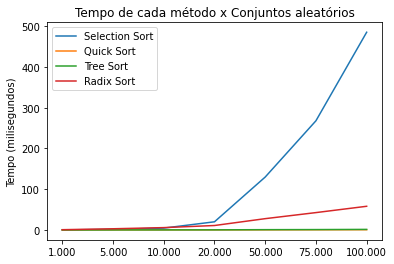

In [154]:
# Tentei executar desse jeito, sendo que demorou muito para gerar o gráfico (mais de 20min)

# plt.plot(["1.000", "5.000", "10.000", "20.000", "50.000", "75.000", "100.000"], (exe(selection_sort), label = "Selection Sort"))
# plt.plot(exe(treesort), label = "Tree Sort")
# plt.plot(exe(radixSort), label = "Radix Sort")
# plt.plot(exe_quick(), label = "Quick Sort") 



plt.plot(["1.000", "5.000", "10.000", "20.000", "50.000", "75.000", "100.000"], selection_geral, label = "Selection Sort")
plt.plot(quick_geral, label = "Quick Sort") # Como o quick sort roda muito rápido e o tree sort também, eles ficaram um em cima do outro no gráfico
plt.plot(tree_geral, label = "Tree Sort")
plt.plot(radix_geral, label = "Radix Sort") 
plt.title("Tempo de cada método x Conjuntos aleatórios")
plt.ylabel("Tempo (milisegundos)")
plt.legend()
plt.show()

# Para cada algoritmo implementado o aluno deve escrever uma análise da complexidade temporal e espacial do algoritmo, essa análise deverá ser escrita no próprio notebook deve conter as informações como:

## Selection Sort
#### Se tivermos n valores em nosso array, Selection Sort tem uma complexidade de tempo de O (n²) no pior caso. Na melhor das hipóteses, já temos um array ordenado, mas precisamos percorrer o array O (n²) vezes para ter certeza. Nesse algoritmo, o melhor caso, o pior caso e o caso ,médio de complexidade de tempo do Selection Sort são os mesmos. E a complexidade do espaço, não precisamos alocar nenhuma memória para que a ordenação ocorra. A complexidade do espaço então é O (1).


## Quick Sort
#### O pior caso ocorre quando o processo de partição sempre escolhe o maior ou o menor elemento como pivô. Se considerarmos a que eu fiz, que o primeiro elemento é sempre escolhido como pivô, o pior caso ocorreria quando a matriz já estivesse classificada em ordem crescente ou decrescente. O pior caso é O (n²).
#### Já o melhor caso e o caso médio ocorre quando o processo de partição sempre escolhe o elemento do meio como pivô. Nesse caso a complexidade é de O (nLogn). 
#### Fato interessante: O QuickSort é mais rápido na prática, porque seu loop interno pode ser implementado com eficiência na maioria das arquiteturas e na maioria dos dados do mundo real.


## Tree Sort
#### Adicionar um item a uma árvore de pesquisa binária leva em média tempo O (log n). Portanto, adicionar n itens levará O (n log n) tempo.
#### Assim como o tempo médio, para o melhor caso vai ser O (n log n), pelos mesmos motivos do caso médio.
#### O pior caso de complexidade de tempo de Tree Sort pode ser melhorado usando uma árvore de busca binária de auto-equilíbrio, como AVL Tree. Usando árvore binária de autobalanceamento, o tree Sort levará O (n log n) tempo para ordenar o array no pior caso também.
#### A complexidade espacial é O (n).


## Radix Sort
#### A complexidade de tempo da radix sort é dada pela fórmula, T(n) = O (d * (n + b)), "d" é o número de dígitos na lista fornecida, "n" é o número de elementos na lista, e "b" é o tamanho da base, que normalmente é base 10 para representação decimal.
